# Power-pairing vs random pairing

_Chuan-Zheng Lee <czlee@stanford.edu>_

This notebook shows a very basic simulation of debate tournaments using power-pairing and random pairing, comparing the variance in actual rank caused by randomness in the draw in both systems.

In [1]:
using PyPlot

# The heavy-lifting simulation methods are in powerpairing.jl.
# You should inspect this file to verify that I've implemented the pairing
# methods and simulations correctly.
include("powerpairing.jl");

# Simulation parameters

If you're running this in Jupyter Notebook, you can change the parameters of the simulations below. It will run `ntournaments` tournaments with `nrounds` rounds in each tournament, each tournament having `nteams` teams.

I haven't tried it myself, but I suspect the behavior of each system depends quite a bit on these parameters. The arguments we make are for typical debate tournaments, in which there are far fewer rounds than there are teams (thus preventing us from just running a round robin).

In [2]:
ntournaments = 100
nteams = 60
nrounds = 5;

In [3]:
function simulateandplot(pairingfunction)
    positions = simulatemanytournaments(pairingfunction, ntournaments, nteams, nrounds)
    boxplot(positions)
    xlabel("true rank")
    ylabel("actual rank")
    xticks(yticks()[1], map(Int, yticks()[1]))
end;

# Plots

In the box-and-whisker plots below, each box (column) is a team, best team on the left, worst team on the right. The box shows the distribution of _actual_ ranks from each of the simulated tournaments. Some important assumptions and notes:

* We model teams' "true" abilities as being ranked from first to last, and a "better" team _always_ beats a "worse" team (not just most of the time).
* For power-pairing, teams are randomly paired within brackets.
* When generating the final _actual_ rank from a tournament, however, teams are assumed to ranked "correctly" within brackets. So teams are ranked first by bracket, then by "true ability". This is advantageous to both systems, of course; you can think of it as modelling an assumption that within brackets, speaker scores will be a proxy for "true ability". (This doesn't work so well for draw strength/opp wins.)
* Other than that, there's no concept of speaker scores in the model. Perhaps it might be an interesting exercise to model this, but that would also reduce the ability of this simulation to capture the essence of the question at hand.
* This model uses two-team formats (like most North American, Oceanian and Asian styles), not British Parliamentary.

The ideal would be a series of zero-height boxes (which would just look like red dashes) along the $y=x$ line, _i.e._ the team with true rank $x$ should always have actual rank $x$ (with no variance). Note that the first and last teams will always come first and last with both tournament structures, because they will win and lose respectively all their debates. It's the teams in the middle where variance comes into play.

**Power-pairing** results in some variance. There's an interesting, but unsurprising, effect with outliers at the bracket boundaries. If a team draws a lucky or unlucky opponent within their bracket, they might end up in the "wrong bracket" at the end, which catapults them up or down the tab. This can happen, but not too often. In most cases, going into a lower bracket the next round "saves" an unlucky team. By and large, the variance isn't totally unbearable.

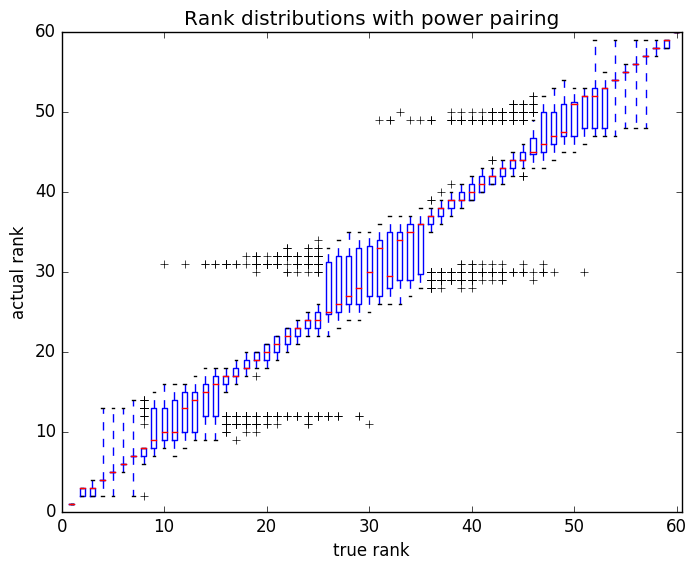

In [4]:
simulateandplot(pairpower2)
title("Rank distributions with power pairing");

**Random pairing**, on the other hand, is all over the place. Again, the first and last teams come first and last. But teams in the middle have both bigger quartile spreads and bigger whisker ranges (excluding outliers). This means there's a much weaker relationship between one's actual rank in any one given tournament and their true rank (and the sole other variable in this model is randomness in the draw).

This, again, isn't surprising. There's a lot more randomness in the system now, so luck of the draw factors in every round. If you have very many rounds—as many as there are teams—each team will converge individually to their true rank. But because there are so few rounds, drawing multiple weak or strong opponents doesn't take that much luck.

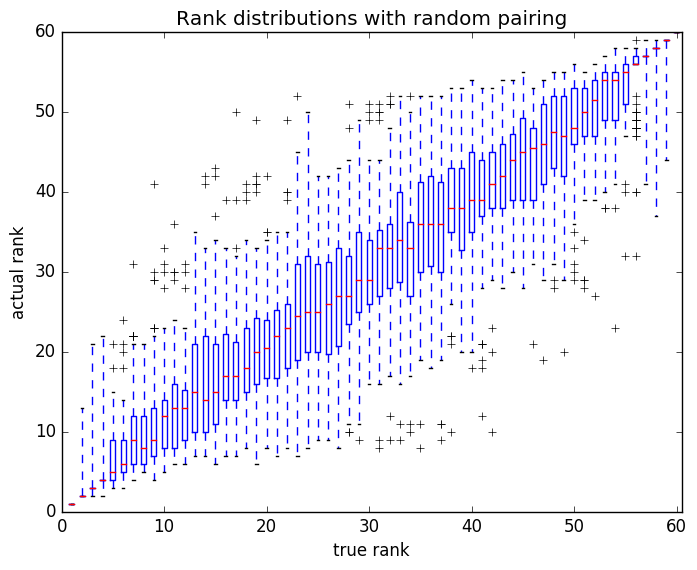

In [5]:
simulateandplot(pairrandom2)
title("Rank distributions with random pairing");

How unlucky do you have to be to draw, say, three strong opponents in an eight-round tournament? Contrary to what you might think, it's not a rare scenario. We can compute the probability of any _given_ team at some percentile rank drawing such opponents using the binomial distribution. Because it's hard to pick a team that should be our "example" rank, we just plot every team's probability of not breaking as a function of their percentile rank. The below plot only plots within the range of the expected break cut-off.

Now, teams close to the break cut-off wouldn't have much cause to complain. In any system, you'd always expect the borderline team to have a half-chance of breaking. The salient group is that in the middle two quartiles of the break: not safe, but also not borderline.

But also, remember this is the probability for any _one_ team of some percentile rank. The probability that any _one_ (or say, three, because one upset doesn't really break a tournament) team in the "true break" being affected would be much higher.

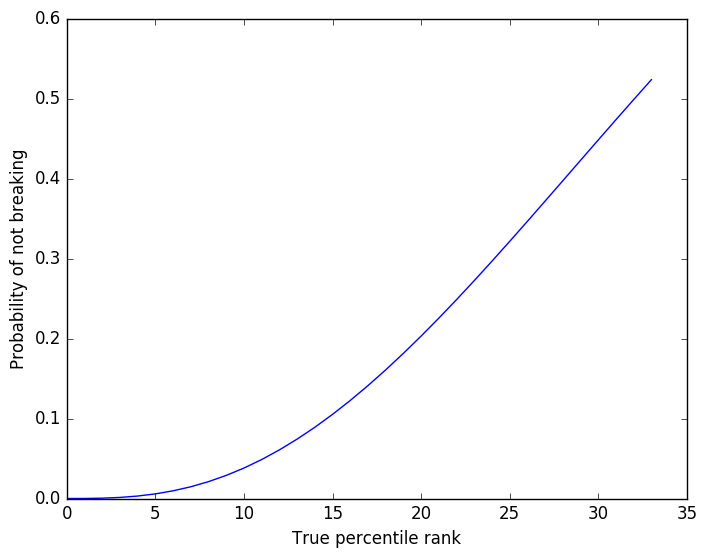

In [6]:
rounds = 8
wins_to_break = 6

ranks = 0:0.01:(rounds+1-wins_to_break)/(rounds+1) # plot up to the expected break cut-off
probnotbreak(rank) = sum([(1-rank)^i*rank^(rounds-i)*binomial(rounds,i) for i in 0:wins_to_break-1])
probs = map(probnotbreak, ranks)
plot(ranks*100, probs)
xlabel("True percentile rank")
ylabel("Probability of not breaking");

# British Parliamentary

British Parliamentary makes all this far less clean. One way to think about power-pairing for two-team formats is that teams move "up" or "down" a bracket each round towards where they "should" be. However, in BP, each team can gain or not gain up to three points in each round. This means that teams in adjacent brackets leap-frog each other every round, which creates more variance in the system.

**Power-pairing**, then, doesn't look nearly so tidy as it did for two-team formats. The effects of bracket boundaries aren't as stark, either. For the same number of teams, there are just a lot more of them. Even in equilibrium, teams might be "off" by up to three brackets, which reflects in the length of whiskers in this plot.

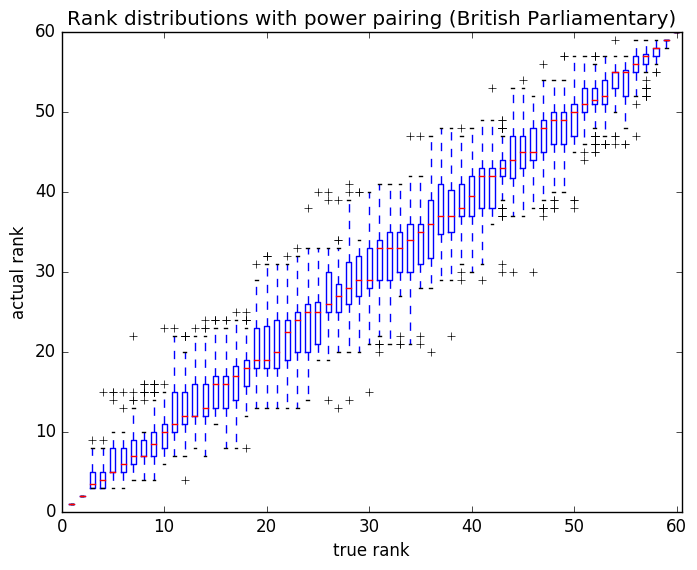

In [7]:
simulateandplot(pairpower4)
title("Rank distributions with power pairing (British Parliamentary)");

**Random pairing** nonetheless still looks worse, just not by as much.

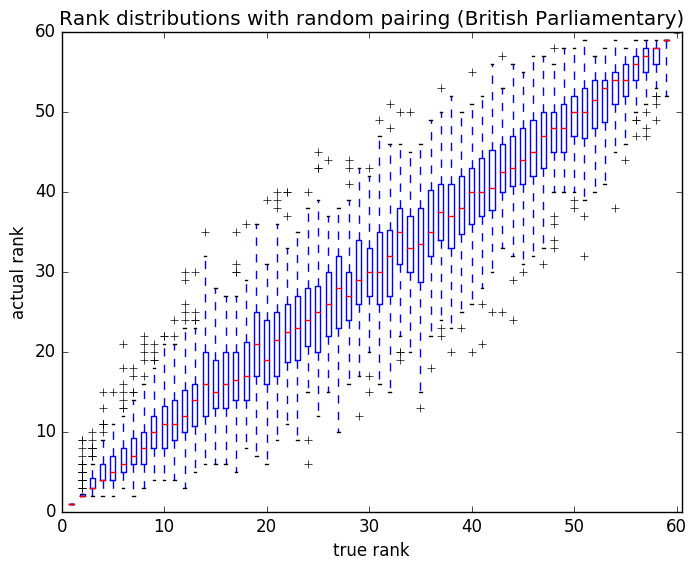

In [8]:
simulateandplot(pairrandom4)
title("Rank distributions with random pairing (British Parliamentary)");